# Your first convolutional neural network

# imports

In [1]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 

from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
import tensorflow as tf
tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], True)

# data

In [3]:
NUM_CLASSES = 10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [6]:
x_train[54, 12, 13, 1] 

0.36862746

# architecture

In [7]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [8]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [9]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [10]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 32)        0   

# train

In [11]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [12]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 34s 678us/step - loss: 1.5550 - accuracy: 0.4576 - val_loss: 1.3700 - val_accuracy: 0.5179
Epoch 2/10
50000/50000 [==============================] - 30s 597us/step - loss: 1.1796 - accuracy: 0.5868 - val_loss: 1.0101 - val_accuracy: 0.6417
Epoch 3/10
50000/50000 [==============================] - 30s 597us/step - loss: 1.0146 - accuracy: 0.6456 - val_loss: 1.0232 - val_accuracy: 0.6375
Epoch 4/10
50000/50000 [==============================] - 30s 592us/step - loss: 0.9196 - accuracy: 0.6798 - val_loss: 0.9174 - val_accuracy: 0.6791
Epoch 5/10
50000/50000 [==============================] - 29s 586us/step - loss: 0.8594 - accuracy: 0.7010 - val_loss: 1.0549 - val_accuracy: 0.6375
Epoch 6/10
50000/50000 [==============================] - 29s 590us/step - loss: 0.8064 - accuracy: 0.7188 - val_loss: 0.8145 - val_accuracy: 0.7129
Epoch 7/10
50000/50000 [==============================] 

In [13]:
model.layers

In [14]:
model.layers[4].get_weights()

[array([[[[ 5.95901497e-02, -6.38489574e-02, -1.62520800e-02, ...,
            1.51689857e-01,  3.07087339e-02,  3.58712785e-02],
          [ 1.11138478e-01,  5.97337447e-03, -4.76558059e-02, ...,
           -4.32699434e-02, -8.94079357e-02, -1.57233253e-01],
          [-9.44307223e-02,  1.48057640e-01, -6.20037504e-02, ...,
           -5.77738360e-02,  1.08518697e-01,  1.53498009e-01],
          ...,
          [ 3.12019046e-02,  8.23811963e-02, -2.16975790e-02, ...,
            8.97965133e-02,  4.04808065e-03,  6.89935386e-02],
          [ 5.13933413e-02, -7.09492266e-02, -1.75390244e-01, ...,
           -1.71169207e-01,  1.54774308e-01, -8.82542804e-02],
          [-9.59333256e-02,  4.88964245e-02,  1.48176923e-02, ...,
            1.01355650e-01,  5.78216538e-02, -8.75730440e-02]],
 
         [[ 6.53148070e-03,  7.17665181e-02,  1.07171118e-01, ...,
           -4.93690707e-02,  1.76735684e-01,  9.16404128e-02],
          [ 8.14346150e-02,  7.30435774e-02, -7.70744011e-02, ...,
     

# analysis

In [15]:
model.evaluate(x_test, y_test, batch_size=1000)

10000/10000 [==============================] - 1s 108us/step


[1.066862666606903, 0.6421999931335449]

In [16]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

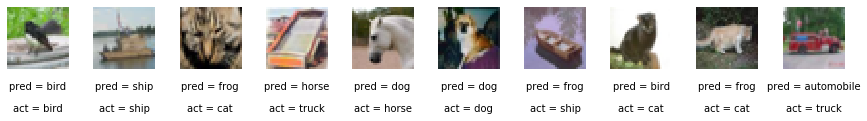

In [17]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
